In [1]:
# To support both python 2 and python 3
# 让这份笔记同步支持 python 2 和 python 3
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [2]:
#使用statsmodels便于统计分析数据
import statsmodels.api as sm
import statsmodels.formula.api as smf
#使用sklearn便于预测（机器学习）
from sklearn import linear_model
#使用patsy便于生成模型
import patsy

# 4.1 An Overview of Classification

**FIGURE 4.1.**

In [3]:
Default = pd.read_csv("data/Default.csv").drop('Unnamed: 0',axis = 1)
Default.head()

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


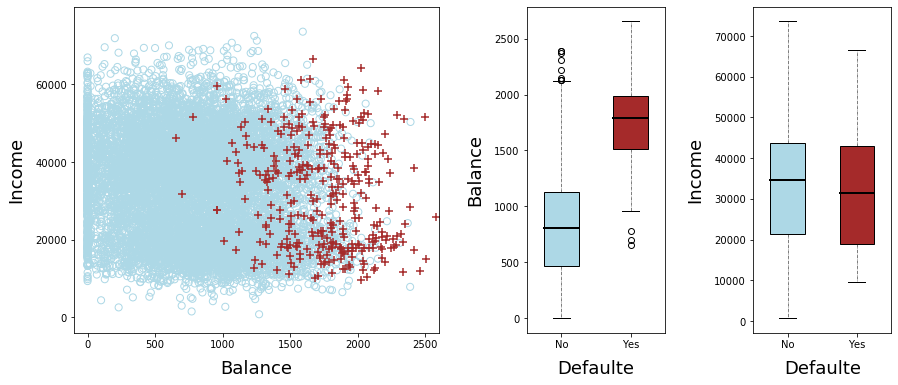

In [4]:
fig = plt.figure(figsize=(16, 6))
# 利用网格确定图形的位置
from matplotlib.gridspec import GridSpec
gs = GridSpec(12, 12) 
#左图
ax1 = fig.add_subplot(gs[:, :5])
ax1.scatter(Default[Default['default'] == 'No']['balance'], 
            Default[Default['default'] == 'No']['income'],
            color='', marker='o', edgecolors='lightblue', s=50)
ax1.scatter(Default[Default['default'] == 'Yes']['balance'], 
            Default[Default['default'] == 'Yes']['income'],
            color='brown', marker='+',s=50)
ax1.set_xlabel("Balance", fontsize=18,labelpad = 10)
ax1.set_ylabel("Income", fontsize=18,labelpad = 10)
ax1.set_xlim(-100,2600)
ax1.set_ylim(-4000, 80000)
ax1.set_xticks(np.linspace(0,2500,6))
ax1.set_yticks(np.arange(0,60001, step=20000))

#右图1
ax2 = fig.add_subplot(gs[:, 6:8])
data_balance = [Default[Default['default'] == 'No']['balance'],Default[Default['default'] == 'Yes']['balance']]
bp =ax2.boxplot(data_balance,sym = 'o', patch_artist = True ,widths=0.5)
for box in bp['boxes']:
    box.set( color='Black', linewidth=1)        # 箱体边框颜色
for whisker in bp['whiskers']:
    whisker.set(color='k', linewidth=0.5,linestyle='-.')
for cap in bp['caps']:
    cap.set(color='Black', linewidth=1)
for median in bp['medians']:
    median.set(color='Black', linewidth=2)
for flier in bp['fliers']:
    flier.set(marker='o',color='Black',linewidth=0.5,alpha = 1)
bp['boxes'][0].set(facecolor = 'lightblue' )
bp['boxes'][1].set(facecolor = 'brown' )
ax2.set_xlabel("Defaulte", fontsize=18,labelpad = 10)
ax2.set_ylabel("Balance", fontsize=18,labelpad = 10)
ax2.set_xticklabels(['No','Yes'])
#右图2
ax3 = fig.add_subplot(gs[:, 9:11])
data_income = [Default[Default['default'] == 'No']['income'],Default[Default['default'] == 'Yes']['income']]
bp =ax3.boxplot(data_income,sym = 'o', patch_artist = True ,widths=0.5)
#以下plt.setp与之前的for循环作用相同，可以做个比较
plt.setp(bp['boxes'], color='Black', linewidth=1)
plt.setp(bp['whiskers'], color='k', linewidth=0.5,linestyle='-.')
plt.setp(bp['caps'], color='Black', linewidth=1)
plt.setp(bp['medians'], color='Black', linewidth=2)
plt.setp(bp['fliers'], marker='o',color='Black',linewidth=0.5,alpha = 1)

bp['boxes'][0].set(facecolor = 'lightblue' )
bp['boxes'][1].set(facecolor = 'brown' )
ax3.set_xlabel("Defaulte", fontsize=18,labelpad = 10)
ax3.set_ylabel("Income", fontsize=18,labelpad = 10)
ax3.set_xticklabels(['No','Yes'])
plt.show()

# 4.2 Why Not Linear Regression?

**FIGURE 4.2.**

In [5]:
#将'default','student'哑变量便于分析
key_titles = ['default','student']
Default_Dummy = Default
for key_title in key_titles:
    dummies = pd.get_dummies(Default[key_title],prefix = key_title)
    Default_Dummy = Default_Dummy.join(dummies)

In [6]:
Default_Dummy.head()

,default,student,balance,income,default_No,default_Yes,student_No,student_Yes
0,No,No,729.526495,44361.625074,1,0,1,0
1,No,Yes,817.180407,12106.134700,1,0,0,1
2,No,No,1073.549164,31767.138947,1,0,1,0
3,No,No,529.250605,35704.493935,1,0,1,0
4,No,No,785.655883,38463.495879,1,0,1,0


In [7]:
y_default,X_Balance = patsy.dmatrices('default_Yes ~ 0 + balance',data = Default_Dummy,return_type="dataframe")

In [8]:
#使用sklearn线性回归估计default概率
lin_reg = linear_model.LinearRegression()
lin_reg.fit(np.c_[X_Balance],np.c_[y_default])
#使用sklearn逻辑斯蒂回归估计default概率
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(penalty = 'none')
log_reg.fit(np.c_[X_Balance],np.c_[y_default].ravel())    

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

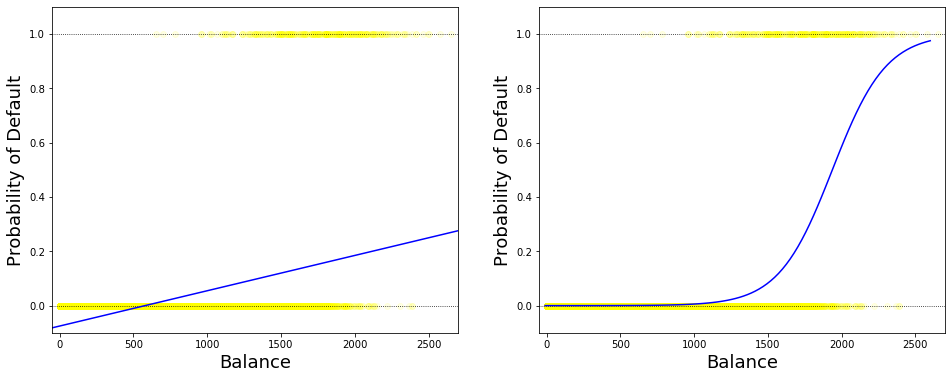

In [9]:
fig = plt.figure(figsize=(16, 6))
#左图绘制
plt.subplot(121)
X_draw = np.linspace(-50,2700,100)
plt.axhline(y=0,linewidth= 0.8,color = 'black',linestyle=':' )
plt.axhline(y=1,linewidth= 0.8,color = 'black',linestyle=':' )
plt.scatter(X_Balance,y_default,color='yellow', alpha=0.1)
plt.plot(X_draw,lin_reg.predict(np.c_[X_draw]),color = 'blue')
plt.xlabel("Balance", fontsize=18)
plt.ylabel("Probability of Default", fontsize=18)
plt.xlim(-50, 2700)
plt.ylim(-0.1,1.1)
plt.xticks(np.linspace(0,2500,6))
plt.yticks(np.arange(0,1.2, step=0.2))
#右图绘制
plt.subplot(122)
X_draw = np.linspace(-10,2600,100)
plt.axhline(y=0,linewidth= 0.8,color = 'black',linestyle=':' )
plt.axhline(y=1,linewidth= 0.8,color = 'black',linestyle=':' )
plt.scatter(np.c_[X_Balance],np.c_[y_default].ravel(),color='yellow', alpha=0.1)
plt.plot(X_draw,log_reg.predict_proba(np.c_[X_draw])[:,1],color = 'blue')
plt.xlabel("Balance", fontsize=18)
plt.ylabel("Probability of Default", fontsize=18)
plt.xlim(-50, 2700)
plt.ylim(-0.1,1.1)
plt.xticks(np.linspace(0,2500,6))
plt.yticks(np.arange(0,1.2, step=0.2))
pass

# 4.3 Logistic Regression

**4.3.1 The Logistic Model**

**4.3.2 Estimating the Regression Coefficients**

**TABLE 4.1.**

In [10]:
#statsmodels方案
glm_smf = smf.logit('default_Yes ~ balance',data = Default_Dummy).fit()
glm_smf.summary()

Optimization terminated successfully.
         Current function value: 0.079823
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            default_Yes   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9998
Method:                           MLE   Df Model:                            1
Date:                Tue, 24 Dec 2019   Pseudo R-squ.:                  0.4534
Time:                        15:36:10   Log-Likelihood:                -798.23
converged:                       True   LL-Null:                       -1460.3
Covariance Type:            nonrobust   LLR p-value:                6.233e-290
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -10.6513      0.361    -29.491      0.000     -11.359      -9.943
balance        0.0055      0.000     24.952      0.000       0.005       0.006
==============================================================================

Possibly complete quasi-separation: A fraction 0.13 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [11]:
#这里只给出coef(glm.fits)对应实现，其他统计对于sklearn实现较为复杂
print('Intercept：' , (log_reg.intercept_).round(4))
print('balance：' , (log_reg.coef_).round(4))

Intercept： [-10.6513]
balance： [[0.0055]]


**4.3.3 Making Predictions**

**TABLE 4.2.**

In [12]:
#statsmodels方案
glm_smf = smf.logit('default_Yes ~ student_Yes',data = Default_Dummy).fit()
glm_smf.summary()

Optimization terminated successfully.
         Current function value: 0.145434
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            default_Yes   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9998
Method:                           MLE   Df Model:                            1
Date:                Tue, 24 Dec 2019   Pseudo R-squ.:                0.004097
Time:                        15:36:10   Log-Likelihood:                -1454.3
converged:                       True   LL-Null:                       -1460.3
Covariance Type:            nonrobust   LLR p-value:                 0.0005416
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -3.5041      0.071    -49.554      0.000      -3.643      -3.366
student_Yes     0.4049      0.115      3.520      0.000       0.179       0.630
===============================================================================
"""

**4.3.4 Multiple Logistic Regression**

**TABLE 4.3.**

In [13]:
#statsmodels方案
glm_smf = smf.logit('default_Yes ~ balance + income + student_Yes',data = Default_Dummy).fit()
glm_smf.summary()

Optimization terminated successfully.
         Current function value: 0.078577
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            default_Yes   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9996
Method:                           MLE   Df Model:                            3
Date:                Tue, 24 Dec 2019   Pseudo R-squ.:                  0.4619
Time:                        15:36:10   Log-Likelihood:                -785.77
converged:                       True   LL-Null:                       -1460.3
Covariance Type:            nonrobust   LLR p-value:                3.257e-292
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     -10.8690      0.492    -22.079      0.000     -11.834      -9.904
balance         0.0057      0.000     24.737      0.000       0.005       0.006
income       3.033e-06    8.2e-06      0.370      0.712    -1.3e-05    1.91e-05
student_Yes    -0.6468      0.236     -2.738      0.006      -1.110      -0.184
===============================================================================

Possibly complete quasi-separation: A fraction 0.15 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

**FIGURE 4.3.**

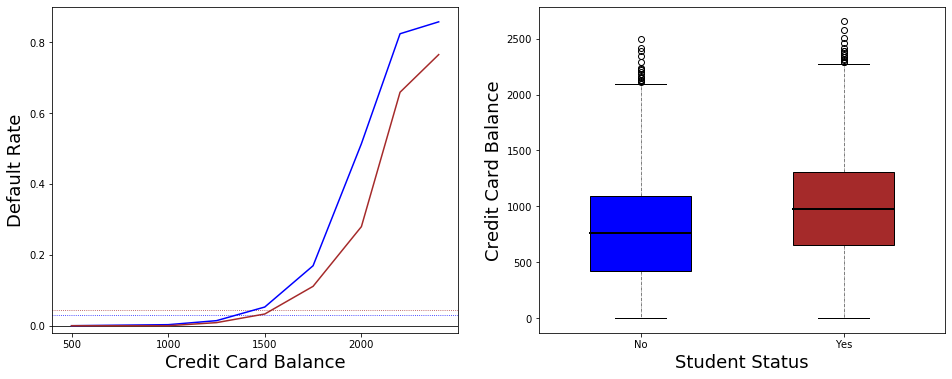

In [14]:
fig = plt.figure(figsize=(16, 6))
Default_student = Default_Dummy[Default_Dummy['student'] == 'Yes']
Default_student_no = Default_Dummy[Default_Dummy['student'] == 'No']
default_ratio_student = Default_student.default_Yes.mean()
default_ratio_student_no = Default_student_no.default_Yes.mean()
"""
Default_student_cut = pd.cut(Default_student.balance,8)
Default_student_no_cut = pd.cut(Default_student_no.balance,8)
Default_student_cut_default_ratio = Default_student.default_Yes.groupby(Default_student_cut).mean()
Default_student_no_cut_default_ratio = Default_student_no.default_Yes.groupby(Default_student_no_cut).mean()
Default_student_cut_cat = []
Default_student_no_cut_cat = []
for index_num in range(8):
    Default_student_cut_cat.append(Default_student_cut_default_ratio.index[index_num].right)
    Default_student_no_cut_cat.append(Default_student_no_cut_default_ratio.index[index_num].right)
"""
bins = [0,500,750,1000,1250,1500,1750,2000,2200,2400]
Default_student_cut = pd.cut(Default_student.balance,bins)
Default_student_no_cut = pd.cut(Default_student_no.balance,bins)
Default_student_cut_default_ratio = Default_student.default_Yes.groupby(Default_student_cut).mean()
Default_student_no_cut_default_ratio = Default_student_no.default_Yes.groupby(Default_student_no_cut).mean()
#左图绘制
plt.subplot(121)
plt.axhline(y = 0,linewidth= 0.8,color = 'black')
plt.axhline(y = default_ratio_student_no,linewidth= 0.8,color = 'blue',linestyle=':' )
plt.axhline(y = default_ratio_student,linewidth= 0.8,color = 'brown',linestyle=':' )
#plt.plot(Default_student_no_cut_cat,Default_student_no_cut_default_ratio,color = 'blue')
#plt.plot(Default_student_cut_cat,Default_student_cut_default_ratio,color = 'brown')
plt.plot(bins[1:],Default_student_no_cut_default_ratio,color = 'blue')
plt.plot(bins[1:],Default_student_cut_default_ratio,color = 'brown')
plt.xlabel("Credit Card Balance", fontsize=18)
plt.ylabel("Default Rate", fontsize=18)
plt.xlim(--400, 2500)
plt.ylim(-0.02,0.9)
plt.xticks(np.linspace(500,2000,4))
plt.yticks(np.arange(0,1, step=0.2))
#右图绘制
plt.subplot(122)
data_balance = [Default_student_no['balance'],Default_student['balance']]
bp = plt.boxplot(data_balance,sym = 'o', patch_artist = True ,widths=0.5,labels = ['No','Yes'])
#以下plt.setp与之前的for循环作用相同，可以做个比较
plt.setp(bp['boxes'], color='Black', linewidth=1)
plt.setp(bp['whiskers'], color='k', linewidth=0.5,linestyle='-.')
plt.setp(bp['caps'], color='Black', linewidth=1)
plt.setp(bp['medians'], color='Black', linewidth=2)
plt.setp(bp['fliers'], marker='o',color='Black',linewidth=0.5,alpha = 1)
bp['boxes'][0].set(facecolor = 'blue' )
bp['boxes'][1].set(facecolor = 'brown' )
plt.xlabel("Student Status", fontsize=18)
plt.ylabel("Credit Card Balance", fontsize=18)
pass

**4.3.5 Logistic Regression for >2 Response Classes**

# 4.4 Linear Discriminant Analysis

**4.4.1 Using Bayes’ Theorem for Classification**

**4.4.2 Linear Discriminant Analysis for p = 1**

**4.4.3 Linear Discriminant Analysis for p >1**

**TABLE 4.4.**

In [15]:
#由于statsmodels没有搜索到LDA/LQA的相关模块，直接使用sklearn实现
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix
y_default,X = patsy.dmatrices('default_Yes ~ 0 + balance + student_Yes',data = Default_Dummy,return_type="dataframe")
lda = LinearDiscriminantAnalysis()
lda.fit(np.c_[X],np.c_[y_default].ravel())
Default_Dummy['default_Yes_lda_predict'] = lda.predict(np.c_[X])

In [16]:
#python生成的是[['TN','FP']['FN','TP']],与R互倒
glm_pred_table = pd.DataFrame(confusion_matrix(Default_Dummy['default_Yes'] , Default_Dummy['default_Yes_lda_predict']).T,
                             index =  [['预约违约情况','预约违约情况'],['没有','有']],
                             columns = [['真实违约情况','真实违约情况'],['没有','有']])
glm_pred_table

真实违约情况     
              没有    有
预约违约情况 没有   9644  252
       有      23   81

In [17]:
Default_Dummy['default_Yes_lda_predict_20%'] = lda.predict_proba(np.c_[X])[:,1] > 0.2

In [18]:
#python生成的是[['TN','FP']['FN','TP']],与R互倒
glm_pred_table = pd.DataFrame(confusion_matrix(Default_Dummy['default_Yes'] , Default_Dummy['default_Yes_lda_predict_20%']).T,
                             index =  [['预约违约情况','预约违约情况'],['没有','有']],
                             columns = [['真实违约情况','真实违约情况'],['没有','有']])
glm_pred_table

真实违约情况     
              没有    有
预约违约情况 没有   9432  138
       有     235  195

**FIGURE 4.7.**

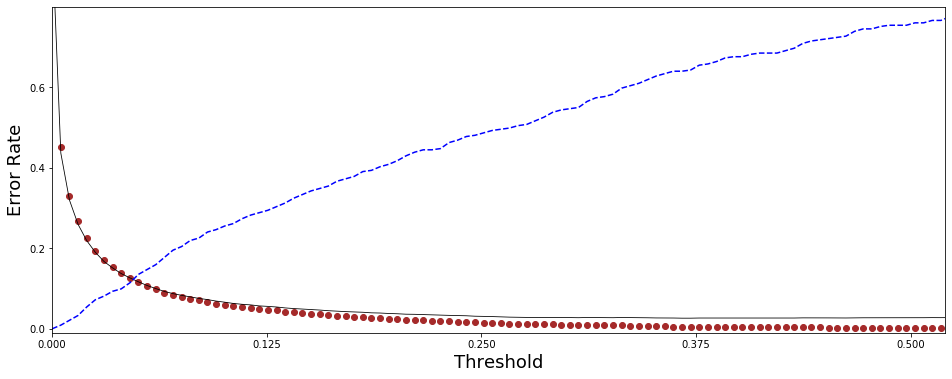

In [19]:
thresholds = np.linspace(0,1,200)
overall_error_rate = []
tpr = []
fpr = []
for threshold in thresholds:
    y_pred_threshold = (lda.predict_proba(np.c_[X])[:,1] > threshold)
    tn, fp, fn, tp = confusion_matrix(Default_Dummy['default_Yes'], y_pred_threshold).ravel()
    overall_error_rate.append((fn + fp)/(tn + fp + fn + tp))
    tpr.append(tp/(tp+fn))
    fpr.append(fp/(fp+tn))
fig = plt.figure(figsize=(16, 6))
plt.plot(thresholds,overall_error_rate,color = 'black',linewidth= 0.8)
plt.plot(thresholds,1 - np.array(tpr),color = 'blue',linestyle='--')
plt.scatter(thresholds,fpr,color = 'brown')
plt.xlabel("Threshold", fontsize=18)
plt.ylabel("Error Rate", fontsize=18)
plt.xlim(--0.02, 0.52)
plt.ylim(-0.01,0.8)
plt.xticks(np.linspace(0,0.5,5))
plt.yticks(np.arange(0,0.8, step=0.2))
plt.show()

**FIGURE 4.8.**

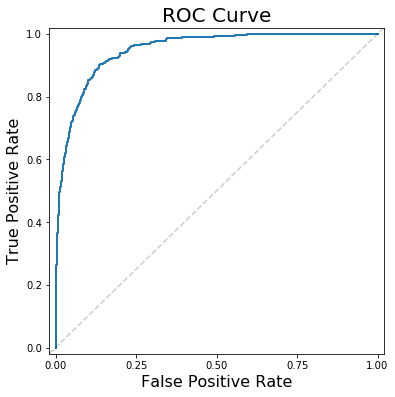

In [20]:
from sklearn.metrics import roc_curve
y_train = Default_Dummy['default_Yes']
y_scores = lda.decision_function(np.c_[X])
fpr, tpr, thresholds = roc_curve(y_train, y_scores)
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([-2, 2], [-2, 2], 'k--',alpha=0.2)
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.xlim(-0.02, 1.02)
    plt.ylim(-0.02, 1.02)
    plt.xticks(np.linspace(0,1,5))
    plt.yticks(np.arange(0,1.2, step=0.2))
    plt.title('ROC Curve', fontsize=20)
fig = plt.figure(figsize=(6, 6))
plot_roc_curve(fpr, tpr)
plt.show()

**4.4.4 Quadratic Discriminant Analysis**

# 4.5 A Comparison of Classification Methods